**WORK IN PROGRESS**

# Rationale

Sepsis is a life-threatening condition that arises when a patient's immune system responds to an infection in a disproportionate manner [(Mayo Clinic 2019)](https://www.mayoclinic.org/diseases-conditions/sepsis/symptoms-causes/syc-20351214). This causes the release of numerous hormones and related chemical responses in the body that can lead to tissue damage, which, if left untreated, can lead to organ failure and death [(Sepsis Alliance 2019)](https://www.sepsis.org/sepsis-basics/what-is-sepsis/). 

Early recognition of uncomplicated sepsis (i.e. no organ dysfunction) in patients presenting to Emergency Departments is associated with improved patient outcomes [(Seymour et al. 2017)](https://www.ncbi.nlm.nih.gov/pubmed/28528569). A recent study showed that an active alert system reduced inpatient mortality and morbidity on a large scale [(Honeyford et al. 2019)](https://academic.oup.com/jamia/advance-article/doi/10.1093/jamia/ocz186/5607431). This system made use of real time patient information to detect sepsis and alert healthcare givers to provide prompt treatment, leading to lower odds of death (OR: 0.76; 95%CI: 0.70-0.84). A similar system in Irish Emergency Departments could prove valuable, particularly given the ongoing 'trolley crisis' [(Halpin & Thomas 2019)](https://www.thejournal.ie/woman-70-left-for-105-hours-on-trolley-in-limerick-hospital-4832123-Oct2019/) and its association with increased patient mortality at 10 days [(Richardson 2006)](https://www.mja.com.au/system/files/issues/184_05_060306/ric10511_fm.pdf). 

# Aim

This notebook sets out the development of a dataset of simulated patients attending an Irish ED with uncomplicated sepsis. 

# Assumptions

1. In order for sepsis to be present, an infective source needs to be present. It will be assumed that if any of the patients within the dataset fulfill the criteria for sepsis, that they have a likely infective source


2. The dataset will only make use of clinical parameters that can be measured at presentation; that is, laboratory parameters will not be included in the dataset. The 'general variables' presented in Appendix 7 of the National Clinical Effectiveness Committee's Sepsis Managament National Clinical Guideline No. 6 [(National Clinical Effectiveness Committee 2014)](https://assets.gov.ie/11620/4678fb449336482fb291a140ef67e570.pdf) will be the only variables of interest included in the dataset. These are as follows
    1. Temperature <36 or >38.3 degrees celsius
    2. Heart rate >90 beats per minute
    3. Respiratoty rate >20 breaths per minute
    4. Altered mental state, recorded as 'Yes' or 'No'
    5. Blood glucose level of >7.7 mmol/L in non-diabetic 
    
    
3. Patients with co-morbidities (e.g. diabetes, compromised immune system, etc) are at increased risk of developing sepsis [(Sepsis Alliance 2019)](https://www.sepsis.org/sepsis-basics/what-is-sepsis/). For the sake of this dataset, it will be assumed that no patient has a co-morbidity or prior medical history that places them at increased risk of developing uncomplicated sepsis.


4. Only patients between 18 and 65 years of age will be included in the dataset. Children have different physiological parameters than adults, and thus different cut-offs for defining sepsis [(Mathias, Mira and Larson 2016)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4913352/pdf/nihms790779.pdf). Adults over the age of 65 are more likely to have multiple co-morbidities [(Barnett et al 2012)], and thus including this population in the dataset will not accurately reflect a 'real' population. 


5. Gender will not be part of the dataset. Although gender is associated with outcomes in patients with *developed* sepsis, there is insufficient evidence that gender is a risk factor for *developing* sepsis [(McNevin et al. 2016)](http://imj.ie/3171-2/).

# Developing the dataset parameters

## Size of dataset
According to the Central Statistics Office (CSO) [(Central Statistics Office 2011)](https://www.cso.ie/en/media/csoie/releasespublications/documents/labourmarket/2010/healthstatusq32010.pdf), 10% of the adult Irish population over 18 years of age attended an accident and emergency (A&E) department. Based on the 2016 census [(Central Statistics Office 2018)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EY007&PLanguage=0), the population of Ireland >18 years of age was estimated at 3,424,795. This equates to roughly 9,383 A&E visits across the country every day. However, the 10% CSO statistic includes repeat presentations; a report compiled by the HSE in 2006 [(HSE 2006)](https://www.hse.ie/eng/services/publications/hospitals/hse-emergency-departments--patient-profiles,-experiences-and-perceptions.pdf) placed this figure closer to 3,300. For the interest of this database, we will work with a daily A&E attendance number of 3,500. 

## Age distribution in data set

Presentations to A&E are not evenly distributed across age categories, with a bimodal presentation peaking at 18-24 years of age, and 70+. Thus, the first parameter for our dataset, namely age, [can be selected from two normal distributions][4] with means at 18 and 70 respectively, standard deviations of 15. This generates a bimodal distribution as shown in the following plot:

[1]: https://www.cso.ie/en/media/csoie/releasespublications/documents/labourmarket/2010/healthstatusq32010.pdf
[2]: https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp
[3]: https://www.hse.ie/eng/services/publications/hospitals/hse-emergency-departments--patient-profiles,-experiences-and-perceptions.pdf
[4]: https://medium.com/@michellemho/faking-data-87c063cf38a7

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(array([  1.,  21.,  74., 168., 275., 248., 148.,  47.,  15.,   3.]),
 array([ 16.47224582,  27.38436341,  38.296481  ,  49.2085986 ,
         60.12071619,  71.03283378,  81.94495137,  92.85706896,
        103.76918655, 114.68130414, 125.59342174]),
 <a list of 10 Patch objects>)

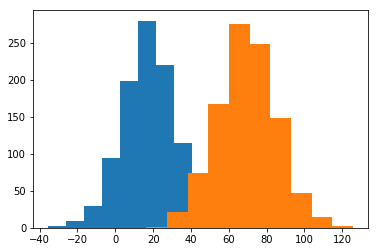

In [2]:
# Generate two normal distributions of 1,000 values, young and old, with mean of 18 and 70 respectively, 
# and standard deviation of 15
y = np.random.normal(18, 15, 1000)
o = np.random.normal(70, 15, 1000)

# Plot histograms the two distributions on the same plot
plt.hist(y)
plt.hist(o)

Thus, two normal distributions give us a bimodal distribution that represents the distribution as it occurs in reality.

However, for the purpose of this exercise, we want to limit our sample to those over 18 years, and under 75 years of age. We also want to create a sample size of 3,500 'patients'. As the data shows that there is roughly an equal proportion of those in the 18-24 age bracket (13%) and the 70+ age bracket (11%), we will sample an equal proportion from each distribution.

In [3]:
# Create counter and population size
count = 0
pop = 3500

# Create list of ages (this will be converted to a dataframe for analysis in due course)
ages = []

# Generate a random list of 3,500 ages from a bimodal distribution
# Run through the random samples as they are generated, and only add ages > 18 and < 75 to the list
while count < pop:
    yng = int(np.random.normal(18, 15)) # Young normal distribution centred around a mean of 15, SD of 15
    # print(yng)
    old = int(np.random.normal(70, 15)) # Old normal distribution centred around a mean of 70, SD of 15
    # print(old)
    if yng < 18:
        continue
    if old > 75:
        continue
    else:
        ages.append(yng)
        ages.append(old)
        count += 2 # Increment count by 2 each time for yng and old age addition

(array([538., 456., 379., 230., 224., 220., 254., 379., 401., 419.]),
 array([18. , 23.7, 29.4, 35.1, 40.8, 46.5, 52.2, 57.9, 63.6, 69.3, 75. ]),
 <a list of 10 Patch objects>)

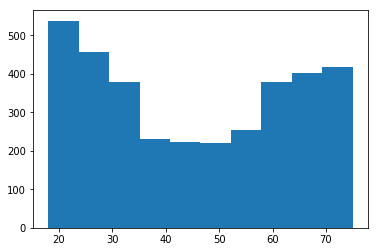

In [4]:
# Plot list to confirm bimodal distribution
plt.hist(ages)

#### Create dataset of 'normal' patients
First, we will create a dataset of patients with ['normal' vital signs][1]. We will select these vital signs from a normal distribution within a set range. We will then select a portion of this sample to be sepsis patients and adjust their parameters accordingly. 

Normal value ranges:
- temp: 36.5 to 37.3 degrees celsius
- heart rate: 60 to 100 beats per minute
- respiratory rate: 12 to 18 breaths per minute
- altered mental state: No
- [blood glucose level][2]: (fasting) 4.0 to 5.9mmol/L, up to 7.7mmol/L after meals 

For the purposes of this equation, the mean for each value (apart from mental state) will be the median of the ranges shown. The standard deviation (SD) will be 1/3 the value between the median and the lower/upper limit of the range. This will ensure that 99% of values chosen are within the ranges shown. As a normal distribution is asymptotic, additional conditionals will be employed to ensure all values fall between the ranges as shown.

[1]: https://medlineplus.gov/ency/article/002341.htm
[2]: https://www.diabetes.co.uk/diabetes_care/blood-sugar-level-ranges.html

In [5]:
'''Create values function to select values from normal range:
    Takes 3 arguments type integer or float:
                        a = lower range limit
                        b = upper range limit
                        size = population size
    Returns a list of values from a normal distribution between a and b of size 'size' '''


def values(a, b, size): # a and b are range limits; size is population size
    # calculate mean
    mn = abs(round((b+a)/2, 2))
    
    # calculate sd
    sd = abs(round((a-mn)/3, 2))
    
    # set counter
    count = 0
    
    # create empty list
    ls = []
    
    # determine values
    while count < size:
        x = (np.random.normal(mn, sd))
        if x < a or x > b:
            continue
        else:
            ls.append(x)
            count += 1
        
    # return list
    return ls

In [6]:
# Create lists of normal vital signs
temp = values(36.5, 37.3, pop)
hr = values(60, 100, pop)
rr = values(12, 18, pop)
gluc = values(4.0, 7.7, pop)

Text(0, 0.5, 'Count')

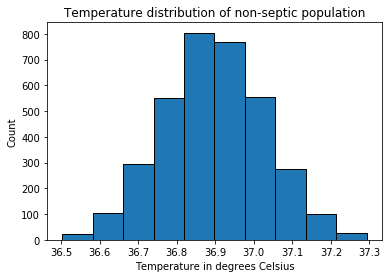

In [7]:
# Plot temp
plt.hist(temp, edgecolor='k')
plt.title('Temperature distribution of non-septic population')
plt.xlabel('Temperature in degrees Celsius')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

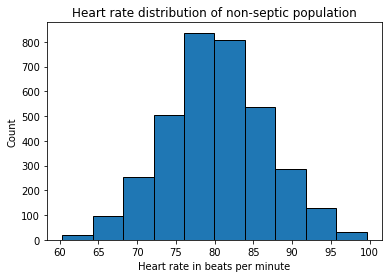

In [8]:
# Plot hr
plt.hist(hr, edgecolor='k')
plt.title('Heart rate distribution of non-septic population')
plt.xlabel('Heart rate in beats per minute')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

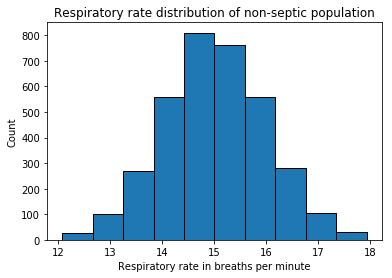

In [9]:
# Plot rr
plt.hist(rr, edgecolor='k')
plt.title('Respiratory rate distribution of non-septic population')
plt.xlabel('Respiratory rate in breaths per minute')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

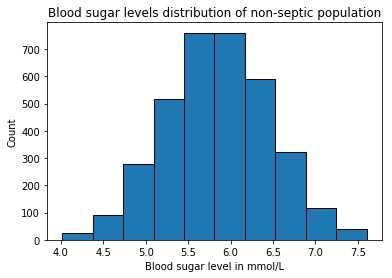

In [10]:
# Plot gluc
plt.hist(gluc, edgecolor='k')
plt.title('Blood sugar levels distribution of non-septic population')
plt.xlabel('Blood sugar level in mmol/L')
plt.ylabel('Count')

In [11]:
# Create dataframe of 'normal' patient values - https://stackoverflow.com/a/30522778
df = pd.DataFrame({'age': ages, 'temp': temp, 'pulse': hr, 'resp_rate': rr, 'sugar': gluc})

In [12]:
# Round values appropriately - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html
df = df.round({'temp': 1, 'pulse': 0, 'resp_rate': 0, 'sugar': 1})

In [13]:
# Convert pulse and resp rate float columns to integers - https://stackoverflow.com/a/21291622
df.pulse = df.pulse.astype(int)
df.resp_rate = df.resp_rate.astype(int)

In [14]:
# Add in the mental status column with all values at 'No' - https://www.interviewqs.com/ddi_code_snippets/add_new_col_df_default_value
df['alt_ment'] = 'no'

# Add in sepsis column with all values at 'no'
df['sepsis'] = 'no'

In [15]:
# Confirm that values entered of correct type
print(df.dtypes)

age            int64
temp         float64
pulse          int64
resp_rate      int64
sugar        float64
alt_ment      object
sepsis        object
dtype: object


In [16]:
# Confirm dataframe stored correctly
df.head()

,age,temp,pulse,resp_rate,sugar,alt_ment,sepsis
0,23,37.1,89,14,5.2,no,no
1,52,36.9,89,16,6.7,no,no
2,18,36.8,81,13,7.4,no,no
3,60,36.9,82,15,6.2,no,no
4,23,37.1,84,16,6.1,no,no


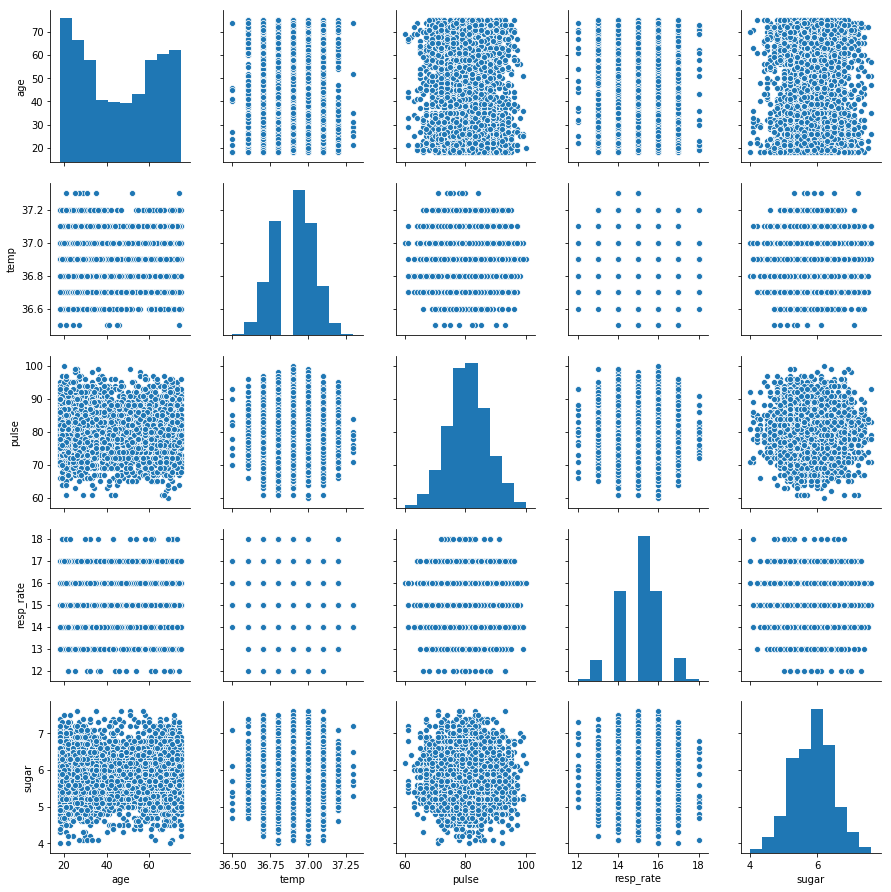

In [17]:
import seaborn as sns
sns.pairplot(df)

In [18]:
df.describe()

,age,temp,pulse,resp_rate,sugar
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.311714,36.897257,80.295714,15.011714,5.845086
std,18.376496,0.134411,6.549456,1.025053,0.615055
min,18.000000,36.500000,60.000000,12.000000,4.000000
25%,28.000000,36.800000,76.000000,14.000000,5.400000
50%,44.000000,36.900000,80.000000,15.000000,5.800000
75%,63.000000,37.000000,85.000000,16.000000,6.300000
max,75.000000,37.300000,100.000000,18.000000,7.600000


##### Create sepsis patients
According to a [study][1] conducted in one of the busiest EDs in Ireland, roughly 4.24% of ED presentations are suffering from sepsis. This proportion is not evenly distributed, with older patients more likely to have sepsis (median 45 without sepsis versus a median of 65 for those with sepsis). In order to accurately reflect this, we will randomly select 4% of the sample between the ages of 50 and 75 to have sepsis. We will then select 0.5% from the remaining sample to have sepsis to represent the possibility of sepsis at all ages.

Not making decision on gender as per article.

[1]: https://www.lenus.ie/bitstream/handle/10147/620877/art3.html?sequence=1

All samples drawn from uniform distribution. Why not normal? As mean unknown, don't know if these samples are skewed. And what is the SD? However, is possible to calculate this from median ans IQR if assumed normal distribution - mean = median, SD = IQR/1.35 (https://www.researchgate.net/post/Is_there_any_way_to_get_mean_and_SD_from_median_and_IQR_interquartile_range)

Median hearbeat from study - 104, IQR 89-113. Thus, draw from range 91 to 130 (IQR between median and IQR is 15. Assuming that additional 15 on top end is complete range of study, thus 130).

Temp - median of 36.7, IQR of 36 to 38. Thus, applying above logic again, upper end of range is 39.3, lower end of range is 36 - 0.7 = 35.3. Need to select randomly from lower (<36) or upper range (>38.3).

Median resp rate was 18, IQR 16-20. Thus, applying same principle as above, range is 14-22. Only rr > 20 is indicative. 

Sugar median was 7.6, IQR 6-9 mmol/L. thus, applying same above principle, range is 4.4 - 10.4. Thus, sepsis is range 7.8 to 10.4

In [19]:
# Create proportion of sample
older = int(pop*0.04)
rest = int(pop*0.005)

In [20]:
def sepsis(a, b): # a is the df row; b is the number of variables to change
    vitals = np.array(['temp', 'pulse', 'resp_rate', 'sugar', 'alt_ment']) # https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html
    for i in range(b):
    # Randomly select variables to change
        vc = np.random.choice(vitals)
        vitals = vitals[vitals!=vc] # https://thispointer.com/delete-elements-from-a-numpy-array-by-value-or-conditions-in-python/
        # print(vc)
        # print(vitals)
        if vc == 'pulse':
            a.at[:, 'pulse'] = np.random.randint(91, 131) # https://www.edureka.co/community/43220/how-to-change-update-cell-value-in-python-pandas-dataframe
            # print(a)
        if vc == 'temp':
            # decide on random upper or lower limit using binomial distribution
            dec = np.random.binomial(1, 0.5)
            if dec == 1:
                a.at[:, 'temp'] = np.random.choice(np.arange(38.3, 39.4))
            else:
                a.at[:, 'temp'] = np.random.choice(np.arange(35.3, 36.1))
            # print(a)
        if vc == 'resp_rate':
            a.at[:, 'resp_rate'] = np.random.randint(21, 23)
            # print(a)
        if vc == 'sugar':
            a.at[:, 'sugar'] = np.random.choice(np.arange(7.8, 10.5))
            # print(a)
        if vc == 'alt_ment':
            a.at[:, 'alt_ment'] = 'yes'
            # print(a)
    a.at[:, 'sepsis'] = 'yes'  
    #print(a)

Selecting number of vitals to change - not evenly distributed. Proportion decreases with following p:
2 - 55% of patients
3 - 36%
4 - 7%
5 - 2%
Need to reflect this in numbers

In [21]:
# Create loop to change proportion of sample

# Reset counter
count = 0

# Run through older proportion of sample 
while count < older:
    # Choose observation randomly, but over 50
    x = df.loc[df.age >= 50].sample() # https://www.pybloggers.com/2018/11/how-to-use-pandas-sample-to-select-rows-and-columns/
    # print(x)
    if (x['sepsis'] == 'yes').bool(): # https://stackoverflow.com/a/36922103
        continue
    # Randomly determine number of vital signs to change - 2, 3, 4, or 5 - with reducing probability - https://stackoverflow.com/a/4266645
    num = np.random.choice(np.arange(2, 6), p=[0.55, 0.36, 0.07, 0.02])
    # print(num)
    # Adjust the corresponding number of vital signs using the sepsis function
    sepsis(x, num)
    df = df.append(x) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
    # print(x)
    count += 1
    # print(count) 

In [22]:
# Run through rest of sample

# Reset count
count = 0 

# Run through rest of sample
while count < rest: 
    # Choose observation randomly
    x = df.sample() # https://www.pybloggers.com/2018/11/how-to-use-pandas-sample-to-select-rows-and-columns/
    # print(x)
    if (x['sepsis'] == 'yes').bool(): # https://stackoverflow.com/a/36922103
        continue
    # Randomly determine number of vital signs to change - 2, 3, 4, or 5 - with reducing probability - https://stackoverflow.com/a/4266645
    num = np.random.choice(np.arange(2, 6), p=[0.55, 0.36, 0.07, 0.02])
    # print(num)
    # Adjust the corresponding number of vital signs using the sepsis function
    sepsis(x, num)
    df = df.append(x) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
    # print(x)
    count += 1
    # print(count) 

In [23]:
df = df.loc[~df.index.duplicated(keep='last')] # https://stackoverflow.com/a/34297689

In [24]:
df

,age,temp,pulse,resp_rate,sugar,alt_ment,sepsis
0,23,37.1,89,14,5.2,no,no
1,52,36.9,89,16,6.7,no,no
2,18,36.8,81,13,7.4,no,no
3,60,36.9,82,15,6.2,no,no
4,23,37.1,84,16,6.1,no,no
5,52,36.8,77,17,6.0,no,no
6,30,36.8,85,16,5.7,no,no
7,67,37.0,79,14,6.1,no,no
8,37,37.1,92,14,5.3,no,no
9,70,37.0,79,16,6.0,no,no


In [25]:
df.sort_index() # http://www.datasciencemadesimple.com/sort-the-dataframe-in-python-pandas-by-index/

,age,temp,pulse,resp_rate,sugar,alt_ment,sepsis
0,23,37.1,89,14,5.2,no,no
1,52,36.9,89,16,6.7,no,no
2,18,36.8,81,13,7.4,no,no
3,60,36.9,82,15,6.2,no,no
4,23,37.1,84,16,6.1,no,no
5,52,36.8,77,17,6.0,no,no
6,30,36.8,85,16,5.7,no,no
7,67,37.0,79,14,6.1,no,no
8,37,37.1,92,14,5.3,no,no
9,70,37.0,79,16,6.0,no,no


In [26]:
z = df['sepsis'].value_counts()

In [27]:
z.yes/z.no*100

4.602510460251046

In [28]:
x = df[df['sepsis']=='yes']
x['age'].median()

62.5

In [29]:
x['temp'].mean()

36.81103896103902

In [30]:
x['pulse']

999     106
647      79
2427     83
2289     80
1829     79
3118     96
1319     77
2253    125
319     100
2087    115
611     115
1639    100
2987     89
1470     98
1103    108
41      116
3011     93
1387     84
1073     85
149      88
3019     72
1083     74
3005    123
241     128
741     115
3235    104
2979     80
2689    121
3175    113
805      85
       ... 
379     114
2695    116
3493    117
3117     94
853      98
629     130
1121     72
2859     94
225     100
1399    121
2231     77
3277     75
1563    108
1505    120
1787    119
2942     74
1908    119
1277     82
291     129
2542    100
2811    114
1036     81
528     130
1575     74
206      80
627      91
1924    103
1077     81
2248    117
3435     86
Name: pulse, Length: 154, dtype: int64

In [31]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


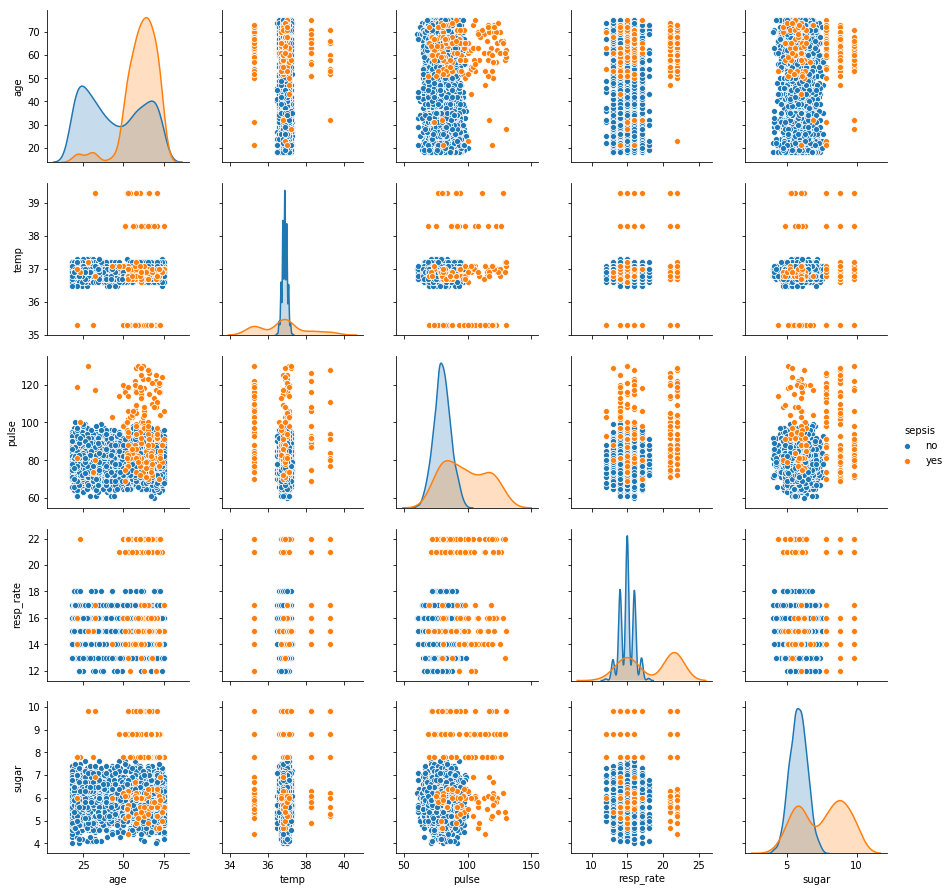

In [32]:
sns.pairplot(df, hue='sepsis')

In [33]:
x['temp']

999     37.1
647     36.8
2427    35.3
2289    36.9
1829    35.3
3118    36.8
1319    39.3
2253    36.8
319     36.6
2087    36.8
611     35.3
1639    35.3
2987    38.3
1470    37.1
1103    36.9
41      35.3
3011    38.3
1387    39.3
1073    35.3
149     36.7
3019    36.9
1083    37.0
3005    36.9
241     39.3
741     36.9
3235    35.3
2979    36.8
2689    37.0
3175    35.3
805     35.3
        ... 
379     35.3
2695    37.0
3493    36.9
3117    39.3
853     36.7
629     35.3
1121    36.8
2859    37.0
225     35.3
1399    37.0
2231    35.3
3277    38.3
1563    38.3
1505    35.3
1787    37.1
2942    35.3
1908    35.3
1277    35.3
291     36.9
2542    36.9
2811    37.1
1036    37.0
528     37.2
1575    35.3
206     39.3
627     39.3
1924    37.1
1077    35.3
2248    36.8
3435    36.8
Name: temp, Length: 154, dtype: float64

In [34]:
import sklearn.neighbors as nei
import sklearn.model_selection as mod

In [35]:
inputs=df[['age', 'temp', 'pulse', 'resp_rate', 'sugar']]
outputs=df['sepsis']

In [36]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [37]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [38]:
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
knn.predict(inputs_test)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [40]:
knn.predict(inputs_test) == outputs_test

1050     True
766      True
258      True
3158     True
3164     True
1346     True
551     False
1578     True
1218     True
3202     True
1535     True
1544     True
99       True
1939     True
3415     True
888      True
3235     True
1207     True
3345     True
1681     True
1757     True
219      True
1086     True
801      True
17       True
3393     True
1277    False
764      True
1992     True
1712     True
        ...  
1789     True
2130     True
2353     True
1257     True
473      True
2453     True
1203     True
1147     True
1842     True
1299     True
931      True
525      True
1997     True
1601     True
788      True
106      True
1641     True
2523     True
1708     True
3260     True
1737     True
2104     True
1069     True
2826     True
1986     True
3124     True
1626     True
22       True
164      True
2174     True
Name: sepsis, Length: 1155, dtype: bool

In [41]:
(knn.predict(inputs_test) == outputs_test).sum()

1134